In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [17]:
def metropolis_hastings(moves, zeta, N0=0, M=1, random=False):
    
    #N = {'step 0': N0}
    N = [N0]
    N_old = N0
    
    for i in range(moves):
        
        if random:
            m = np.random.choice(np.arange(1, M+1))
        else:
            m = M
                
        u = np.random.uniform()
        if u < .5:
            N_new = N_old - m
            if N_new<0:
                N_new = 0
            acc_prob = np.minimum(1, np.math.factorial(N_old)/(np.math.factorial(N_new)*zeta**m))
            
            N_old = np.random.choice([N_new, N_old], p=[acc_prob, 1-acc_prob])
        else:
            N_new = N_old + m
            acc_prob = np.minimum(1, (np.math.factorial(N_old)*zeta**m)/np.math.factorial(N_new))
            
            N_old = np.random.choice([N_new, N_old], p=[acc_prob, 1-acc_prob])
        
        N.append(N_old)
        
    return np.asarray(N)

In [31]:
N = metropolis_hastings(moves=int(1e6), zeta=100, N0=0, M=3, random=False)

In [23]:
unique, counts = np.unique(N, return_counts=True)

In [24]:
p_eq = np.zeros(len(unique))
for i_n, n in enumerate(unique):
    p_eq[i_n] = 10.**n * np.e**(-10.) / np.math.factorial(n)

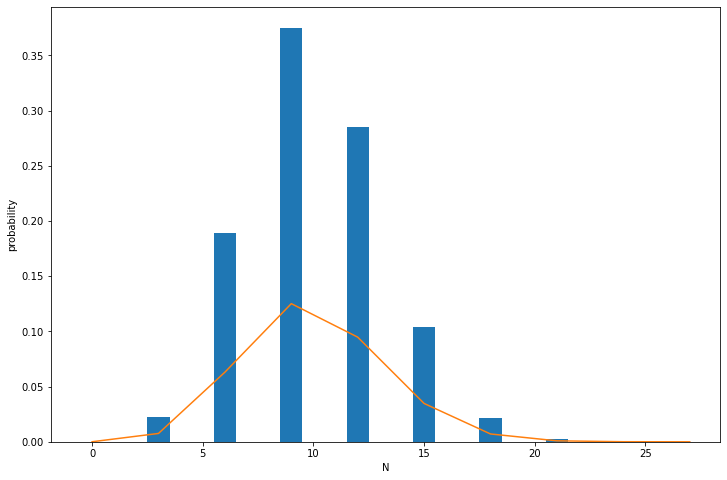

In [30]:
fig1, ax1 = plt.subplots(figsize=(12,8))
probs, _, _ = ax1.hist(N, bins=N.max(), density=True, align='left')
ax1.plot(unique, p_eq)
ax1.set_xlabel('N')
ax1.set_ylabel('probability')
plt.show()